SYDE 572: Final Project

By: Jainish Mehta, 20773809

Initial Loading of Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aid_disease_mapping.csv to aid_disease_mapping.csv


In [ ]:
# Load the feature of the activities
import pandas as pd
import io
 
df_features = pd.read_csv('aid_disease_mapping.csv')
df_features = df_features.iloc[: , 1:]
print(df_features)

     cancer  nervous System  immune system  cardiovascular  toxicity  obesity  \
0         1               0              0               0         0        0   
1         0               1              1               0         0        1   
2         1               0              1               0         0        0   
3         0               1              0               1         0        0   
4         0               1              1               1         0        0   
..      ...             ...            ...             ...       ...      ...   
595       0               0              0               0         1        0   
596       1               0              1               0         1        1   
597       1               0              1               0         1        1   
598       0               0              0               0         1        0   
599       0               0              0               0         1        0   

     virus  diabetes  metab

In [ ]:
import numpy as np
df_classes = pd.read_csv('aid_target_mapping.csv')
df_classes = df_classes.iloc[: , 1:]

# Number of rows with more than 1 class
count=0
for i in range(len(df_classes)):
  if(np.count_nonzero(np.array(df_classes.iloc[i])==1))>1:
    count+=1
print(count)

4


In [ ]:
df_classes = df_classes.to_numpy()
df_features = df_features.to_numpy()

In [ ]:
import numpy
class_organization = []
print(type(df_classes))
for i in range(len(df_classes)):
  class_organization.append((i, numpy.where(df_classes[i] == 1)[0]))

df_classes_non_empty=[]
for i in range(len(class_organization)):
  if len(class_organization[i][1])==1:
    df_classes_non_empty.append((class_organization[i][0],class_organization[i][1][0]))


print(df_classes_non_empty)

df_features_non_empty=[]
for i in range(len(df_classes_non_empty)):
  df_features_non_empty.append(df_features[df_classes_non_empty[i][0]])

for i in range(len(df_classes_non_empty)):
  df_classes_non_empty[i] = df_classes_non_empty[i][1]
print(df_features_non_empty)
print(df_classes_non_empty)

<class 'numpy.ndarray'>
[(1, 5), (3, 4), (10, 9), (11, 0), (12, 0), (15, 3), (16, 1), (17, 2), (19, 4), (20, 9), (21, 9), (23, 7), (25, 3), (26, 0), (29, 0), (31, 6), (34, 1), (35, 5), (38, 6), (39, 0), (42, 4), (44, 1), (45, 3), (46, 1), (47, 1), (50, 5), (51, 11), (52, 3), (53, 2), (54, 2), (57, 7), (58, 3), (61, 1), (62, 1), (63, 7), (64, 7), (65, 7), (71, 5), (72, 9), (73, 4), (80, 9), (82, 0), (83, 7), (86, 7), (91, 6), (92, 1), (93, 0), (94, 0), (98, 11), (99, 4), (101, 6), (102, 0), (103, 3), (104, 5), (105, 8), (108, 8), (110, 7), (112, 7), (113, 1), (118, 7), (123, 0), (125, 3), (127, 6), (131, 0), (132, 0), (133, 9), (134, 1), (137, 5), (138, 1), (142, 7), (143, 8), (144, 8), (149, 1), (151, 1), (152, 8), (155, 8), (161, 0), (162, 0), (163, 0), (164, 0), (168, 2), (171, 9), (172, 4), (173, 4), (174, 1), (175, 1), (176, 1), (177, 2), (178, 0), (179, 1), (180, 2), (181, 7), (183, 7), (184, 0), (186, 0), (187, 0), (188, 0), (189, 12), (192, 4), (193, 4), (194, 0), (195, 1), (196

SMOTE

In [ ]:
# Perform SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

counter = Counter(df_classes_non_empty)
print(counter)
oversample = SMOTE(k_neighbors=4)
df_features_non_empty, df_classes_non_empty = oversample.fit_resample(df_features_non_empty, df_classes_non_empty)
counter = Counter(df_classes_non_empty)
print(counter)
print(df_features_non_empty)

Counter({0: 82, 1: 52, 2: 50, 3: 35, 5: 26, 4: 25, 8: 22, 7: 20, 6: 20, 9: 17, 10: 10, 11: 9, 12: 6, 13: 5})
Counter({5: 82, 4: 82, 9: 82, 0: 82, 3: 82, 1: 82, 2: 82, 7: 82, 6: 82, 11: 82, 8: 82, 12: 82, 13: 82, 10: 82})
[[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# First use KNN to predict future growth
# Translate the grouping into the target molecular

import random

random.seed(10)
# Split the feature of the activities
from sklearn.model_selection import train_test_split
print(len(df_features_non_empty))
df_features_train, df_features_test, df_classes_train, df_classes_test = train_test_split(df_features_non_empty, df_classes_non_empty, test_size=0.2)
print(len(df_features_train))

1148
918


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aid_target_mapping.csv to aid_target_mapping.csv


In [ ]:
# Reduce train feature down to 2
"""
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_dataset_features)
train_dataset_features_transformed = pca.transform(train_dataset_features)
test_dataset_features_transformed = pca.transform(test_dataset_features)
print(len(test_dataset_features_transformed ))
"""

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=2)\npca.fit(train_dataset_features)\ntrain_dataset_features_transformed = pca.transform(train_dataset_features)\ntest_dataset_features_transformed = pca.transform(test_dataset_features)\nprint(len(test_dataset_features_transformed ))\n'

KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Get ROC-AUC Score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    other_class = [x for x in unique_class if x != per_class]

    new_pred_class = [0 if x in other_class else 1 for x in pred_class]
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]

    roc_auc_dict[per_class] = roc_auc_score(new_actual_class, new_pred_class, average = average)

  return roc_auc_dict

accuracies=[]
precision=[]
recall=[]
f_1_score=[]
roc_score=[]
print(np.argmax(df_classes_test,axis=0))
for i in range(1,6):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(df_features_train, df_classes_train)
  y_pred = neigh.predict(df_features_test)
  count = 0
  for j in range(len(df_classes_test)):
    if (df_classes_test[j] == y_pred[j]).all():
      count += 1
  accuracies.append(count / y_pred.shape[0])
  precision.append(precision_score(df_classes_test, y_pred,average='macro'))
  recall.append(recall_score(df_classes_test, y_pred, average='macro'))
  f_1_score.append(f1_score(df_classes_test, y_pred, average='macro'))
  roc_score.append(roc_auc_score_multiclass(df_classes_test, y_pred))

print(accuracies)
print(precision)
print(recall)
print(f_1_score)
print(roc_score)

15


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

[0.2826086956521739, 0.26521739130434785, 0.2826086956521739, 0.22608695652173913, 0.1956521739130435]
[0.3025885208776914, 0.23394830583613072, 0.3961585041942185, 0.3430075483329343, 0.31902644497940347]
[0.274586180319263, 0.25290872974143647, 0.28237554008230703, 0.22102932051240323, 0.20630731006670858]
[0.23468939686549067, 0.18122988120496908, 0.24328820953052735, 0.22077677826525757, 0.20011368157333229]
[{0: 0.7494158878504674, 1: 0.5910451484160638, 2: 0.8385052447552447, 3: 0.5937984496124031, 4: 0.5, 5: 0.7410492733073378, 6: 0.5, 7: 0.6365303983228511, 8: 0.651395173453997, 9: 0.656415343915344, 10: 0.4908675799086758, 11: 0.5931818181818181, 12: 0.5, 13: 0.4976303317535545}, {0: 0.7783294392523364, 1: 0.7062858568221501, 2: 0.7939248251748252, 3: 0.5310077519379844, 4: 0.4815668202764977, 5: 0.7095001772421128, 6: 0.5, 7: 0.5, 8: 0.5961538461538461, 9: 0.7787698412698413, 10: 0.5, 11: 0.5, 12: 0.5, 13: 0.5}, {0: 0.6086448598130841, 1: 0.6173609378897481, 2: 0.793924825174

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):


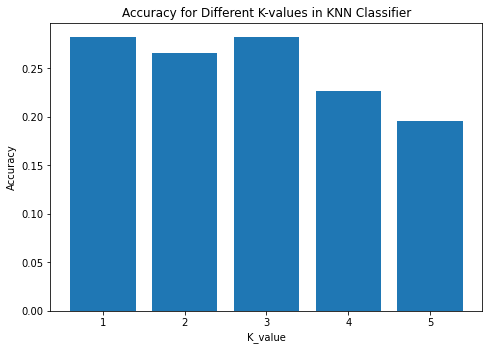

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
k_values = [1,2,3,4,5]
ax = plt.gca()
ax.bar(k_values, accuracies)
plt.title("Accuracy for Different K-values in KNN Classifier")
plt.xlabel("K_value")
plt.ylabel("Accuracy")
plt.show()

LSH Forest Classifier (Not Completed)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
print(len(df_features_train))
for i in range(len(df_classes_train)):
    idx = df_classes_train[i]


#Note that sklearn had this classification feature built-in previously
# from sklearn.neighbors import LSHForest

918


KNN-KD Algorithm [Pseudo Code Only]

In [ ]:
"""
Input: treeroot, the root of a KD-tree; test_point, a point of test data

Output: predict_label, the label of the point

1. While (root is not a leaf)
    searchPath.add(root)
    root[axis ]> test_point[axis] ? Searchtree(rightChild): Searchtree(leftChild)

For point in searchPath:
  nearest_dis← Compute_distance (point, test_point)
  If (| test_point[axis] - root[axis]|  <  |point[axis] - test_point[axis]|)
    (root.nextchild)
    dis← Compute_distance (childpoint, test_point)
    If (dis < nearest_dis)
        nearest_dis← dis


predict_label←nearestPoint.label
return predict_label

"""

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(df_features_train, df_classes_train)
dtree_predictions = dtree_model.predict(df_features_test)

In [ ]:

count = 0
for i in range(len(df_classes_test)):
  if (df_classes_test[i] == dtree_predictions[i]).all():
    count += 1
print(count)
print(count / dtree_predictions.shape[0])
print("Precision Score: "+str(precision_score(df_classes_test, dtree_predictions,average='macro')))
print("Recall Score: "+str(recall_score(df_classes_test, dtree_predictions, average='macro')))
print("F1 Score: "+str(f1_score(df_classes_test, dtree_predictions, average='macro')))
print("ROC/AUC Score: "+str(roc_auc_score_multiclass(df_classes_test, dtree_predictions)))

39
0.16956521739130434
Precision Score: 0.19020666397688069
Recall Score: 0.2047470589266255
F1 Score: 0.1316740232011168
ROC/AUC Score: {0: 0.7213476940071805, 1: 0.5, 2: 0.793867422899681, 3: 0.5, 4: 0.4976303317535545, 5: 0.5833333333333334, 6: 0.49523809523809526, 7: 0.5, 8: 0.5408883354088833, 9: 0.5, 10: 0.5113636363636364, 11: 0.5431529059615864, 12: 0.8064516129032258, 13: 0.5}


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):


Index(['cancer', 'nervous System', 'immune system', 'cardiovascular',
       'toxicity', 'obesity', 'virus', 'diabetes', 'metabolic disorders',
       'bacteria', 'parasite', 'epigenetics_genetics', 'pulmonary',
       'infection', 'aging', 'fungal'],
      dtype='object')


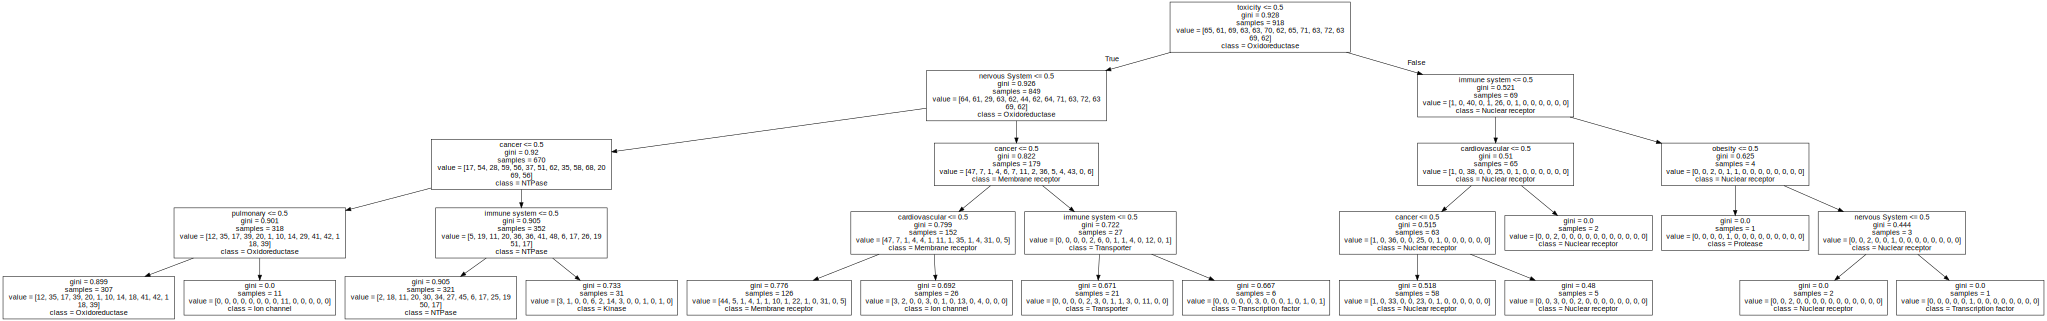

In [ ]:
from sklearn import tree
import graphviz
# DOT data
df_features = pd.read_csv('aid_disease_mapping.csv')
df_features = df_features.iloc[: , 1:]
print(df_features.columns)
df_classes = pd.read_csv('aid_target_mapping.csv')
df_classes = df_classes.iloc[: , 1:]
dot_data = tree.export_graphviz(dtree_model, out_file=None, 
                                feature_names=list(df_features.columns),  
                                class_names=list(df_classes.columns))

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(max_depth = 4).fit(df_features_train, df_classes_train)
dtree_predictions = dtree_model.predict(df_features_test)

In [ ]:
count = 0
for i in range(len(df_classes_test)):
  if (df_classes_test[i] == dtree_predictions[i]).all():
    count += 1
print(count)
print(count / dtree_predictions.shape[0])
print("Precision Score: "+str(precision_score(df_classes_test, dtree_predictions,average='macro')))
print("Recall Score: "+str(recall_score(df_classes_test, dtree_predictions, average='macro')))
print("F1 Score: "+str(f1_score(df_classes_test, dtree_predictions, average='macro')))
print("ROC/AUC Score: "+str(roc_auc_score_multiclass(df_classes_test, dtree_predictions)))

53
0.23043478260869565
Precision Score: 0.2837368788979006
Recall Score: 0.26213077796447987
F1 Score: 0.20873685180391918
ROC/AUC Score: {0: 0.7213476940071805, 1: 0.5308726361357942, 2: 0.793867422899681, 3: 0.6794711898228984, 4: 0.5, 5: 0.581039755351682, 6: 0.4928571428571429, 7: 0.49765258215962443, 8: 0.6226650062266501, 9: 0.5742080319281617, 10: 0.5795454545454546, 11: 0.5431529059615864, 12: 0.8087557603686636, 13: 0.5}


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):


XGBoost

In [ ]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
model = XGBClassifier() 
print(df_classes_train)

model = XGBClassifier()
df_features_train = numpy.array(df_features_train)
df_classes_train = numpy.array(df_classes_train)

model.fit(df_features_train, df_classes_train)


y_pred = model.predict(df_features_test)
print(y_pred)
count = 0
for j in range(len(df_classes_test)):
  if (df_classes_test[j] == y_pred[j]).all():
    count += 1
print(count / y_pred.shape[0])
print("Precision Score: "+str(precision_score(df_classes_test, y_pred,average='macro')))
print("Recall Score: "+str(recall_score(df_classes_test, y_pred, average='macro')))
print("F1 Score: "+str(f1_score(df_classes_test, y_pred, average='macro')))
print("ROC/AUC Score: "+str(roc_auc_score_multiclass(df_classes_test, y_pred)))

ModuleNotFoundError: ignored

Support Vector Machines

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if not np.any(mask):
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

[[(0.1, 0.2), (1, 0.2), (3, 0.2), (4, 0.2), (5, 0.2)], [(0.1, 0.043478260869565216), (1, 0.22608695652173913), (3, 0.25217391304347825), (4, 0.25217391304347825), (5, 0.25217391304347825)], [(0.1, 0.07391304347826087), (1, 0.20869565217391303), (3, 0.20434782608695654), (4, 0.20434782608695654), (5, 0.20434782608695654)], [(0.1, 0.043478260869565216), (1, 0.19130434782608696), (3, 0.1956521739130435), (4, 0.1956521739130435), (5, 0.19130434782608696)]]
[[(0.1, 0.2598191604258718), (1, 0.2598191604258718), (3, 0.2598191604258718), (4, 0.2598191604258718), (5, 0.2598191604258718)], [(0.1, 0.003105590062111801), (1, 0.40011537734752023), (3, 0.37519469326192006), (4, 0.37519469326192006), (5, 0.37519469326192006)], [(0.1, 0.01853138280483818), (1, 0.170115268329554), (3, 0.2679466887311193), (4, 0.2679466887311193), (5, 0.26773928869793534)], [(0.1, 0.003105590062111801), (1, 0.2366810966810967), (3, 0.23126056949586363), (4, 0.23126056949586363), (5, 0.2257050139403081)]]
[[(0.1, 0.23106

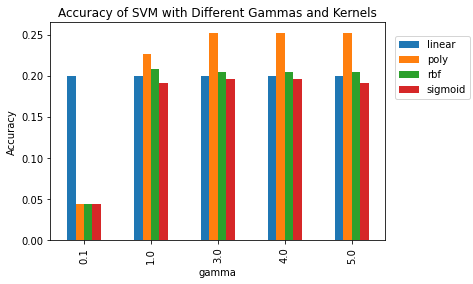

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
gammas=[0.1,1, 3, 4,5]
kernels=['linear', 'poly', 'rbf', 'sigmoid']
overall_acc = []
precision=[]
recall=[]
f_1_score=[]
roc_score=[]


for i in range(len(kernels)):
  kernel_gamma_accuracy=[]
  kernel_gamma_precision=[]
  kernel_gamma_recall=[]
  kernel_gamma_f_1_score=[]
  kernel_gamma_roc_score=[]
  for j in range(len(gammas)):
    svm = SVC(kernel= kernels[i], gamma=gammas[j], random_state=1, C=0.1)
    svm.fit(df_features_train, df_classes_train)
    
    # Mode performance
    y_pred = svm.predict(df_features_test)
    kernel_gamma_accuracy.append((gammas[j], accuracy_score(df_classes_test, y_pred)))
    kernel_gamma_precision.append((gammas[j], precision_score(df_classes_test, y_pred,average='macro')))
    kernel_gamma_recall.append((gammas[j], recall_score(df_classes_test, y_pred,average='macro')))
    kernel_gamma_f_1_score.append((gammas[j], f1_score(df_classes_test, y_pred,average='macro')))
    kernel_gamma_roc_score.append((gammas[j], roc_auc_score_multiclass(df_classes_test, y_pred,average='macro')))
  overall_acc.append(kernel_gamma_accuracy)
  precision.append(kernel_gamma_precision)
  recall.append(kernel_gamma_recall)
  f_1_score.append(kernel_gamma_f_1_score)
  roc_score.append(kernel_gamma_roc_score)
print(overall_acc)
print(precision)
print(recall)
print(f_1_score)
print(roc_score)

temp1 = pd.DataFrame([[overall_acc[0][0][0],'linear',overall_acc[0][0][1]],
                        [overall_acc[0][1][0],'linear',overall_acc[0][1][1]],
                        [overall_acc[0][2][0],'linear',overall_acc[0][2][1]],
                        [overall_acc[0][3][0],'linear',overall_acc[0][3][1]],
                        [overall_acc[0][4][0],'linear',overall_acc[0][4][1]],
                      [overall_acc[1][0][0], 'poly',overall_acc[1][0][1]],
                        [overall_acc[1][1][0], 'poly',overall_acc[1][1][1]],
                        [overall_acc[1][2][0], 'poly',overall_acc[1][2][1]],
                        [overall_acc[1][3][0], 'poly',overall_acc[1][3][1]],
                        [overall_acc[1][4][0], 'poly',overall_acc[1][4][1]],
                      [overall_acc[2][0][0],'rbf',overall_acc[1][0][1]],
                        [overall_acc[2][1][0],'rbf',overall_acc[2][1][1]],
                        [overall_acc[2][2][0],'rbf',overall_acc[2][2][1]],
                        [overall_acc[2][3][0],'rbf',overall_acc[2][3][1]],
                        [overall_acc[2][4][0],'rbf',overall_acc[2][4][1]],
                      [overall_acc[3][0][0],'sigmoid',overall_acc[3][0][1]],
                        [overall_acc[3][1][0],'sigmoid',overall_acc[3][1][1]],
                        [overall_acc[3][2][0],'sigmoid',overall_acc[3][2][1]],
                        [overall_acc[3][3][0],'sigmoid',overall_acc[3][3][1]],
                        [overall_acc[3][4][0],'sigmoid',overall_acc[3][4][1]]],
                     columns=['gamma','kernel','accuracy'])

temp1.pivot('gamma','kernel','accuracy').plot(kind='bar')

leg = plt.legend( loc = 'upper middle')
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.2
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


plt.ylabel('Accuracy')
plt.title('Accuracy of SVM with Different Gammas and Kernels')
plt.show()

Bernoulli Naive Bayes (Generative Parametric Models)

In [ ]:
# Look into https://iq.opengenus.org/bernoulli-naive-bayes/

#Neural Networks

Extreme Learning Machine

In [ ]:
# training
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0
    train_running_correct = 0
    counter = 0
    for i, data in (enumerate(trainloader)):
      counter += 1
      print(data)
      image, labels = data
      print (type(image))
      image = image.to(device=device, dtype=torch.float) 
      labels = labels.to(device, dtype=torch.int64)
      optimizer.zero_grad()
      outputs = model(image)
      loss = criterion(outputs, labels)
      train_running_loss += loss.item()
      _, preds = torch.max(outputs.data, 1)
      train_running_correct += (preds == labels).sum().item()
      loss.backward()
      optimizer.step()
    
    epoch_loss = train_running_loss / counter
    epoch_acc = 100 * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc

In [ ]:
# validation
def test(model, testloader, criterion):
    model.eval()

    valid_running_loss = 0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in enumerate(testloader):
            counter += 1
            image, labels = data
            image = image.to(device=device, dtype=torch.float) 
            labels = labels.to(device, dtype=torch.int64) 
            outputs = model(image)
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
        
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100 * (valid_running_correct / len(testloader.dataset))

    print('\n')
    return epoch_loss, epoch_acc

In [ ]:

from __future__ import print_function
import argparse
import torch
import torch.utils.data.dataloader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import time

# Basic settings
root = 'data'
num_classes = 14
batch_size = 64   
num_epochs = 5      
device = 'cpu'   
print_interval = 50 

# Need to do Moore-Penrose inverse
class pseudoInverse(object):
  # Initialize parameters 
    def __init__(self,params,C=1e-2,forgettingfactor=1,L =100):
        self.params=list(params)
        self.C=C
        self.L=L
        self.w=self.params[len(self.params)-1]
        self.w.data.fill_(0)

    def initialize(self):
      # Get variable inverse
        self.M = Variable(torch.inverse(self.C * torch.eye(self.dimInput)),requires_grad=False)
        self.w = self.params[len(self.params) - 1]
        self.w.data.fill_(0.0)

    def pseudoBig(self,inputs):
       # [ n_features * n_features ]
        xtx = torch.mm(inputs.t(), inputs)
        dimInput=inputs.size()[1]
        # Get 2d tensor with ones on the diagonal and zeros elsewhere, Variable is a wrapper around a PyTorch Tensor, and represents a node in a computational graph
        I = Variable(torch.eye(dimInput),requires_grad=False, volatile=True)
        if self.L >0:
          self.M = Variable(torch.inverse(xtx.data + self.C *I.data), requires_grad=False)
        
        else:
          # [ 1 * n_features ], mean of input
          #Do matrix multiplication
          S = torch.mm((inputs - torch.mean(inputs, dim=0, keepdim=True)).t(), (inputs - torch.mean(inputs, dim=0, keepdim=True)))
          self.M = Variable(torch.inverse(xtx.data + self.C * (I.data+self.L*S.data)),requires_grad=False)
          
        #Output is matrix multiplcatiion of M and t
        w = torch.mm(torch.mm(self.M, inputs.t()))
        self.w.data = w.t().data

    def train(self,inputs,targets):
        targets = targets.view(targets.size(0),-1)
        self.pseudoBig(inputs,targets)


class Net(nn.Module):
    def __init__(self,hidden_size=7000,activation='leaky_relu'):
        super(Net, self).__init__()
        # Initial layer
        self.fc1 = nn.Linear(16, hidden_size)
        # Get activation function
        self.activation = getattr(F,'leaky_relu')
        # Fills the input Tensor with values
        torch.nn.init.xavier_uniform_(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))
        self.fc2 = nn.Linear(hidden_size, 14, bias=False) 

    def forward(self, x):
        x = self.fc2(self.activation(self.fc1(x.view(x.size(0),-1))))
        return x

    def forwardToHidden(self, x):
        x = self.activation(self.fc1(x.view(x.size(0),-1)))
        return x

model = Net(hidden_size=8000,activation='leaky_relu')
optimizer= pseudoInverse(params=model.parameters(),C=0.001,L=0)
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, 
                      weight_decay=0.0005)

model = model.to(device)

[INFO]: 248,000 total parameters.
[INFO]: 248,000 trainable parameters.


<ipython-input-97-c5c00ba62e7f>:62: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))


In [ ]:
import numpy as np
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
con =[]
for i in range(len(df_features_train)):
  con.append([df_features_train[i], np.array(df_classes_train[i])])
print(len(df_features_train))
train_dataloader = torch.utils.data.DataLoader(con, batch_size=14,
                                               shuffle=True)
con =[]
for i in range(len(df_features_test)):
  con.append([np.array(df_features_test[i]), np.array(df_classes_test[i])])
test_dataloader = torch.utils.data.DataLoader(con, batch_size=14,
                                               shuffle=True)
print(type(df_features_test))
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_dataloader,
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = test(model, test_dataloader,  
                                                criterion)
    print(np.corrcoef(df_features_train, df_features_test))
    
    
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)

918
<class 'list'>
[INFO]: Epoch 1 of 20
Training
[[tensor([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0]), tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])], tensor([ 4,  5, 11,  7,  5, 13,  7, 11,  8,  0,  5,  5, 11,  4])]
<class 'list'>


AttributeError: ignored

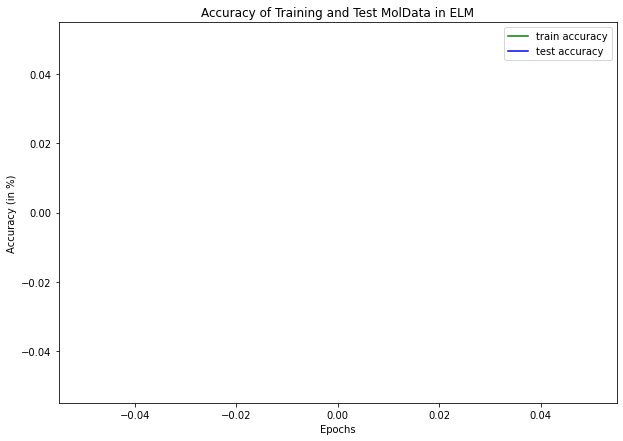

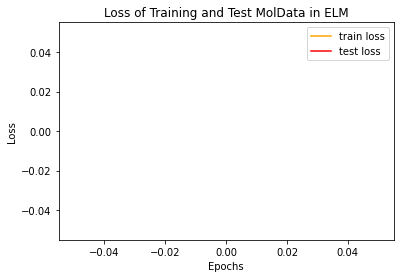

In [ ]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-', 
    label='train accuracy'
)
plt.plot(
    valid_acc, color='blue', linestyle='-', 
    label='test accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (in %)')
plt.legend()
plt.title('Accuracy of Training and Test MolData in ELM')
plt.show()

plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss'
)
plt.plot(
    valid_loss, color='red', linestyle='-', 
    label='test loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of Training and Test MolData in ELM')
plt.show()

MLP

In [ ]:
import torch
import torchvision.datasets as datasets
from torchvision import datasets, transforms
from torch import nn, optim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Basic settings
root = 'data'
num_classes = 14
batch_size = 64   
num_epochs = 5      
device = 'cpu'   
print_interval = 50 

class MLP(nn.Module):
  def __init__(self, in_channels, num_classes=1000):
    super(MLP, self).__init__()
    self.in_channels = in_channels
    self.num_classes = num_classes
    self.linear_layers = nn.Sequential (  
      nn.Linear(16, 512),   
      nn.ReLU(inplace=True),
      nn.Linear(512, 1024),
      nn.BatchNorm1d(1024), 
      nn.Linear(1024, 1024), 
      nn.ReLU(inplace=True),  
      nn.Linear(1024, 14), 
      nn.ReLU(inplace=True),  
      nn.Dropout(0.1)
  )
  def forward(self, x):
    # flatten to prepare for the fully connected layers
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, 
                      weight_decay=0.0005)

model = model.to(device) 

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
con =[]
for i in range(len(df_features_train)):
  con.append([df_features_train[i], np.array(df_classes_train[i])])
print(len(df_features_train))
train_dataloader = torch.utils.data.DataLoader(con, batch_size=14,
                                               shuffle=True)
con =[]
for i in range(len(df_features_test)):
  con.append([np.array(df_features_test[i]), np.array(df_classes_test[i])])
test_dataloader = torch.utils.data.DataLoader(con, batch_size=14,
                                               shuffle=True)
print(type(df_features_test))
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_dataloader,
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = test(model, test_dataloader,  
                                                criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)

Streaming output truncated to the last 5000 lines.
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), tensor([10,  7,  0,  6,  1,  9,  6,  3,  4,  8, 12, 10,  3, 12])]
<class 'torch.Tensor'>
[tensor([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 

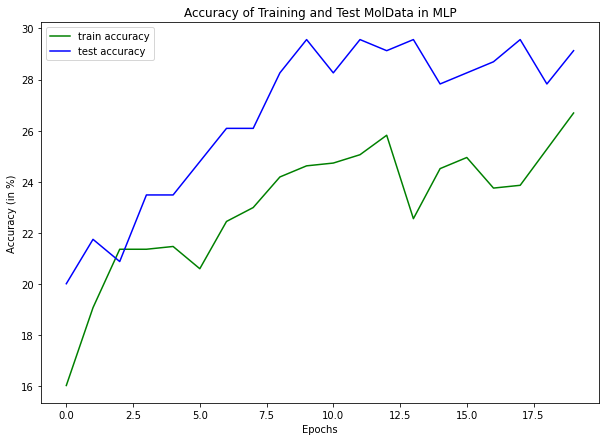

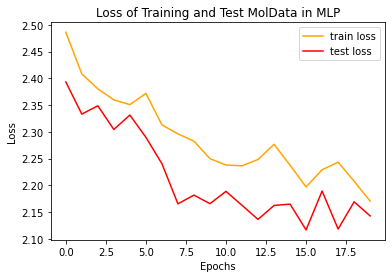

In [ ]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-', 
    label='train accuracy'
)
plt.plot(
    valid_acc, color='blue', linestyle='-', 
    label='test accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (in %)')
plt.legend()
plt.title('Accuracy of Training and Test MolData in MLP')
plt.show()

plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss'
)
plt.plot(
    valid_loss, color='red', linestyle='-', 
    label='test loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of Training and Test MolData in MLP')
plt.show()

Radial Basis Function Neural Network

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

root = 'data'
num_classes = 14
batch_size = 64   
num_epochs = 5      
device = 'cpu'   
print_interval = 50 

# RBF Layer, inspired in part by Jeremy Linux

class RBF(nn.Module):

    def __init__(self, in_features, out_features):
        super(RBF, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.centres = nn.Parameter(torch.Tensor(out_features, in_features))
        self.log_sigmas = nn.Parameter(torch.Tensor(out_features))
        self.reset_parameters()

  # For resetting the parameters for each epoch
    def reset_parameters(self):
        nn.init.constant_(self.log_sigmas, 0)
        nn.init.normal_(self.centres, 0, 1)

    def forward(self, input):
        size = (input.size(0), self.out_features, self.in_features)
        # Get the centers and input 
        numerator = (input.unsqueeze(1).expand((input.size(0), self.out_features, self.in_features)) - self.centres.unsqueeze(0).expand((input.size(0), self.out_features, self.in_features))).pow(2).sum(-1).pow(0.5)
        # logarithm of the learnable scaling factors of shape from out features
        denominator = torch.exp(self.log_sigmas).unsqueeze(0)
        distances = numerator/denominator
        # Gaussian RBF kernel
        return torch.exp(-1*distances.pow(2))


class Network(nn.Module):
    
    def __init__(self, layer_widths, layer_centres):
        super(Network, self).__init__()
        # Get RBF then linear layers
        self.rbf_layers = nn.ModuleList()
        self.linear_layers = nn.ModuleList()
        for i in range(len(layer_widths) - 1):
            self.rbf_layers.append(RBF(layer_widths[i], layer_centres[i]))
            self.linear_layers.append(nn.Linear(layer_centres[i], layer_widths[i+1]))
    
    def forward(self, x):
        out = x
        for i in range(len(self.rbf_layers)):
            out = self.rbf_layers[i](out)
            out = self.linear_layers[i](out)
        return out

# Based on feature and classes input and output, respectively
layer_widths = [16, 14]
layer_centres = [30]

rbfnet = Network(layer_widths, layer_centres)

train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
epochs=20
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(rbfnet, train_dataloader,
                                              torch.optim.Adam(rbfnet.parameters(), lr=0.01), nn.CrossEntropyLoss())
    valid_epoch_loss, valid_epoch_acc = test(rbfnet, test_dataloader,  
                                                nn.CrossEntropyLoss())
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)


[INFO]: Epoch 1 of 20
Training
[tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 1,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]]), tensor([11, 13,  0,  1,  5,  3, 13,  1, 11, 10,  7, 13, 12, 11,  6,  3, 13,  3,
         5, 12,  4,  2,  0,  3, 12, 10,  6,  0,  1,  5,  3,  5,  1,  8,  6,  9,
        13,  3, 13,  3,  2,  8, 13, 11,  6, 13, 13, 12,  1, 13,  6, 13, 11, 11,
        10,  6, 12, 10, 10,  8,  2,  9, 11, 12])]
<class 'torch.Tensor'>
[tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), tensor([ 1,  8,  1,  6,  2,  0, 10,  9,  9,  0, 13,  3,  2,  3,  2,  4,  9,  1,
         8,  7,  3,  7, 13, 12, 11,  7,  5,  5, 11,  5, 11,  6,  8,  0,  7,  7,
         4,  4,  9, 10,  4, 13,  5, 12,  1, 10,  6,  0, 

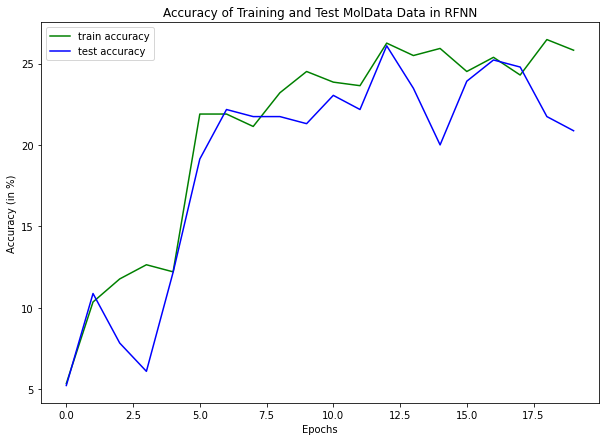

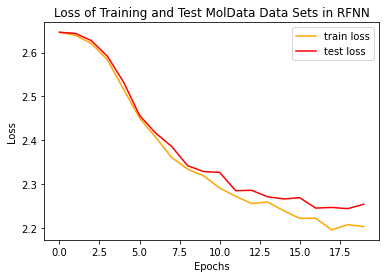

In [ ]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-', 
    label='train accuracy'
)
plt.plot(
    valid_acc, color='blue', linestyle='-', 
    label='test accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (in %)')
plt.legend()
plt.title('Accuracy of Training and Test MolData Data in RFNN')
plt.show()

plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss'
)
plt.plot(
    valid_loss, color='red', linestyle='-', 
    label='test loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of Training and Test MolData Data Sets in RFNN')
plt.show()

Hyperparameterization

MLP Hyperparameterization - Regular SGD

In [ ]:
# validation
def test(model, testloader, criterion):
    model.eval()

    valid_running_loss = 0
    valid_running_correct = 0
    counter = 0
    MSE=[]
    with torch.no_grad():
        for i, data in enumerate(testloader):
            counter += 1
            image, labels = data
            image = image.to(device=device, dtype=torch.float) 
            labels = labels.to(device, dtype=torch.int64) 
            outputs = model(image)
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
            summation = 0
            for i in range (0,len(np.array(preds))):
              difference = np.array(preds)[i] - np.array(labels)[i]
              squared_difference = difference**2 
              summation = summation + squared_difference 
            MSE.append(summation/len(np.array(preds)))
        
    
    MSE_average=0
    for i in range(len(MSE)):
      MSE_average+=MSE[i]
    MSE_average = MSE_average/len(MSE)

    epoch_loss = valid_running_loss / counter
    epoch_acc = 100 * (valid_running_correct / len(testloader.dataset))

    print('\n')
    return epoch_loss, epoch_acc, MSE_average

In [ ]:
# training
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0
    train_running_correct = 0
    counter = 0
    MSE=[]
    for i, data in (enumerate(trainloader)):
      counter += 1
      print(data)
      image, labels = data
      print (type(image))
      image = image.to(device=device, dtype=torch.float) 
      labels = labels.to(device, dtype=torch.int64)
      optimizer.zero_grad()
      outputs = model(image)
      loss = criterion(outputs, labels)
      train_running_loss += loss.item()
      _, preds = torch.max(outputs.data, 1)
      print("Prediction")
      print(np.array(preds))
      print(np.array(labels))
      summation = 0
      for i in range (0,len(np.array(preds))):
        difference = np.array(preds)[i] - np.array(labels)[i]
        squared_difference = difference**2 
        summation = summation + squared_difference 
      MSE.append(summation/len(np.array(preds)))
      train_running_correct += (preds == labels).sum().item()
      loss.backward()
      optimizer.step()
    MSE_average=0
    for i in range(len(MSE)):
      MSE_average+=MSE[i]
    MSE_average = MSE_average/len(MSE)
    epoch_loss = train_running_loss / counter
    epoch_acc = 100 * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc, MSE_average

In [ ]:
class MLP(nn.Module):
  def __init__(self, in_channels, num_classes=1000):
    super(MLP, self).__init__()
    self.in_channels = in_channels
    self.num_classes = num_classes
    self.linear_layers = nn.Sequential (  
      nn.Linear(16, 512),   
      nn.ReLU(inplace=True),
      nn.Linear(512, 1024),
      nn.BatchNorm1d(1024), 
      nn.Linear(1024, 1024), 
      nn.ReLU(inplace=True),  
      nn.Linear(1024, 14), 
      nn.ReLU(inplace=True),  
      nn.Dropout(0.1)
  )
  def forward(self, x):
    # flatten to prepare for the fully connected layers
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, 
                      weight_decay=0.0005)

model = model.to(device) 

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
def accuracy_loss_MSE():
  train_loss, valid_loss = [], []
  train_acc, valid_acc = [], []
  train_MSE, valid_MSE=[], []
  con =[]
  for i in range(len(df_features_train)):
    con.append([df_features_train[i], np.array(df_classes_train[i])])
  print(len(df_features_train))
  train_dataloader = torch.utils.data.DataLoader(con, batch_size=64,
                                                shuffle=True)
  con =[]
  for i in range(len(df_features_test)):
    con.append([np.array(df_features_test[i]), np.array(df_classes_test[i])])
  test_dataloader = torch.utils.data.DataLoader(con, batch_size=64,
                                                shuffle=True)
  print(type(df_features_test))
  for epoch in range(epochs):
      print(f"[INFO]: Epoch {epoch+1} of {epochs}")
      train_epoch_loss, train_epoch_acc, train_epoch_MSE = train(model, train_dataloader,
                                                optimizer, criterion)
      valid_epoch_loss, valid_epoch_acc, test_epoch_MSE = test(model, test_dataloader,  
                                                  criterion)
      train_loss.append(train_epoch_loss)
      valid_loss.append(valid_epoch_loss)
      train_acc.append(train_epoch_acc)
      valid_acc.append(valid_epoch_acc)
      train_MSE.append(train_epoch_MSE)
      valid_MSE.append(test_epoch_MSE)
      print('\n')
      print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
      print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
      print(f"MSE: {train_epoch_MSE:.3f}, Test MSE acc: {test_epoch_MSE:.3f}")
      print('-'*50)
  print("Average Training MSE: "+ str(sum(train_MSE) / len(train_MSE)))
  print("Average Testing MSE: "+ str(sum(valid_MSE) / len(valid_MSE)))

In [ ]:
def plot_accuracy_loss():
  # accuracy plots
  plt.figure(figsize=(10, 7))
  plt.plot(
      train_acc, color='green', linestyle='-', 
      label='train accuracy'
  )
  plt.plot(
      valid_acc, color='blue', linestyle='-', 
      label='test accuracy'
  )
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy (in %)')
  plt.legend()
  plt.title('Accuracy of Training and Test MolData in MLP')
  plt.show()

  plt.plot(
      train_loss, color='orange', linestyle='-', 
      label='train loss'
  )
  plt.plot(
      valid_loss, color='red', linestyle='-', 
      label='test loss'
  )
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Loss of Training and Test MolData in MLP')
  plt.show()

MLP Hyperparameterization - Nesterov

In [ ]:
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.NAdam(model.parameters(), lr=0.005,
                      weight_decay=0.0005)

model = model.to(device) 

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
accuracy_loss_MSE()

Streaming output truncated to the last 5000 lines.
        [0, 1, 0,  ..., 0, 0, 0]]), tensor([ 9,  0,  0, 11, 12,  0,  4,  9,  1, 10,  1,  6,  8,  2,  5,  6,  1,  0,
         2, 12, 12,  8, 10, 13,  0, 11, 12, 10,  2, 10, 10,  9,  6, 10,  4,  2,
         3,  2, 11,  5,  6,  7, 11, 13, 11,  4,  1,  5,  1,  1,  4,  0, 10, 10,
         6,  5, 10,  7, 10,  6,  5,  0,  3,  1])]
<class 'torch.Tensor'>
Prediction
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 9  0  0 11 12  0  4  9  1 10  1  6  8  2  5  6  1  0  2 12 12  8 10 13
  0 11 12 10  2 10 10  9  6 10  4  2  3  2 11  5  6  7 11 13 11  4  1  5
  1  1  4  0 10 10  6  5 10  7 10  6  5  0  3  1]
[tensor([[0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]]), tensor([ 8,  0, 11,  4, 13,  3,  8,  6,  1

MLP Hyperparameterization - AdaDelta

In [ ]:
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.Adadelta(params=model.parameters(), lr=0.01,weight_decay=0.0005)

model = model.to(device) 

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
accuracy_loss_MSE()

Streaming output truncated to the last 5000 lines.
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]]), tensor([ 0,  0,  6,  7,  7, 10, 10,  8,  8,  4, 13,  6, 13, 10,  9, 12,  1,  7,
        10,  8,  0, 11,  7,  7,  7,  9, 11, 13,  8,  2,  1,  0,  3,  3,  3, 10,
         8, 13, 13, 13,  8,  3, 12,  0,  9,  2,  1,  6,  5, 13,  5, 10,  8,  9,
         2, 11, 11,  3,  9,  9, 11,  3,  2,  7])]
<class 'torch.Tensor'>
Prediction
[11  4 10 12 12 12 12  8  8 11 11 12 13  1 12 12  0 12  1  8 11 11  7 12
 12  8  4 10  8  0 12 11 12  1 12 12 10  0 13 10  0  4 12  8 10 11  1  6
 12 10 12 12 11 10  0 11 11 12 11 11 11  1  4 12]
[ 0  0  6  7  7 10 10  8  8  4 13  6 13 10  9 12  1  7 10  8  0 11  7  7
  7  9 11 13  8  2  1  0  3  3  3 10  8 13 13 13  8  3 12  0  9  2  1  6
  5 13  5 10  8  9  2 11 11  3  9  9 11  3  2  7]
[tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        ...,
        [0, 1

MLP Hyperparameterization - Adam

In [ ]:
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001,
                      weight_decay=1e-4)

model = model.to(device) 

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
accuracy_loss_MSE()

Streaming output truncated to the last 5000 lines.
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]]), tensor([ 6,  7,  9,  7,  2,  3, 10, 10,  7, 13, 11,  2, 10, 11,  2,  8,  5, 13,
         1,  9,  9, 13,  7,  0, 12, 13, 12, 10,  6,  6,  3,  0, 13,  4,  6, 10,
         5,  1,  4, 13,  5, 12,  0,  9, 12, 12,  2,  6, 13,  4,  3, 13,  4,  3,
        13,  3,  6,  0,  4,  4, 13,  0,  4,  0])]
<class 'torch.Tensor'>
Prediction
[ 0  0  0  0  0  0  8  0  5  0  8  1  0  0  2  8  5  8  0  0  8  0  0  8
  0  0  0  0  1  8  0  0  0  0  0  0  2  0  0  0 11  0  0  0  0  0  2  5
  0 11  3  9  1  0  8  0  0  8  0  0  9  8  1  0]
[ 6  7  9  7  2  3 10 10  7 13 11  2 10 11  2  8  5 13  1  9  9 13  7  0
 12 13 12 10  6  6  3  0 13  4  6 10  5  1  4 13  5 12  0  9 12 12  2  6
 13  4  3 13  4  3 13  3  6  0  4  4 13  0  4  0]
[tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

MLP Hyperparameterization - KLDivLoss

In [ ]:
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.KLDivLoss()
# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001,
                      weight_decay=1e-4)

model = model.to(device) 

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
accuracy_loss_MSE()

910
<class 'list'>
[INFO]: Epoch 1 of 20
Training
[tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0]]), tensor([ 7,  0,  8,  3,  8,  2,  8,  6,  6, 12, 13,  2, 11,  4,  7,  2,  6,  3,
        11, 12,  6,  5,  1,  3, 10,  9,  2,  5,  4,  2, 10,  2,  9,  2,  3,  3,
         0,  6,  2, 13,  4, 13,  0, 12,  1,  6,  3,  8,  3,  8,  7, 11, 11,  3,
         8,  6,  0,  4,  5, 12, 12,  6,  1, 11])]
<class 'torch.Tensor'>


RuntimeError: ignored

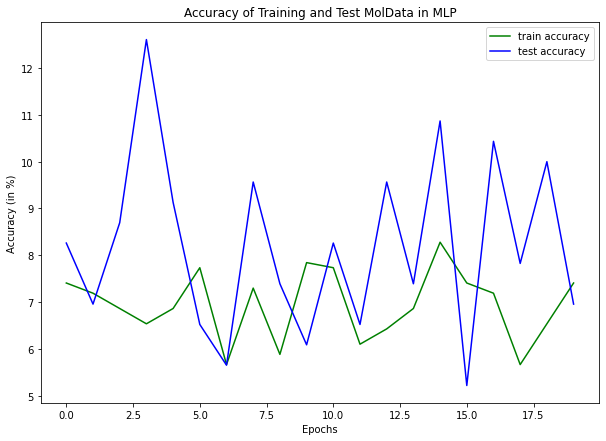

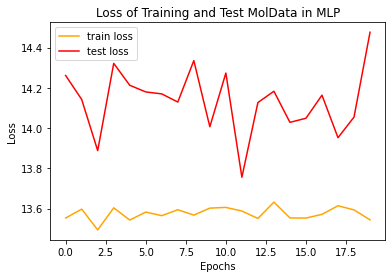

In [ ]:
plot_accuracy_loss()

ELM Hyperparameterization - Regular SGD

In [ ]:

from __future__ import print_function
import argparse
import torch
import torch.utils.data.dataloader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import time

# Basic settings
root = 'data'
num_classes = 14
batch_size = 64   
num_epochs = 5      
device = 'cpu'   
print_interval = 50 

# Need to do Moore-Penrose inverse
class pseudoInverse(object):
  # Initialize parameters 
    def __init__(self,params,C=1e-2,forgettingfactor=1,L =100):
        self.params=list(params)
        self.C=C
        self.L=L
        self.w=self.params[len(self.params)-1]
        self.w.data.fill_(0)

    def initialize(self):
      # Get variable inverse
        self.M = Variable(torch.inverse(self.C * torch.eye(self.dimInput)),requires_grad=False)
        self.w = self.params[len(self.params) - 1]
        self.w.data.fill_(0.0)

    def pseudoBig(self,inputs):
       # [ n_features * n_features ]
        xtx = torch.mm(inputs.t(), inputs)
        dimInput=inputs.size()[1]
        # Get 2d tensor with ones on the diagonal and zeros elsewhere, Variable is a wrapper around a PyTorch Tensor, and represents a node in a computational graph
        I = Variable(torch.eye(dimInput),requires_grad=False, volatile=True)
        if self.L >0:
          self.M = Variable(torch.inverse(xtx.data + self.C *I.data), requires_grad=False)
        
        else:
          # [ 1 * n_features ], mean of input
          #Do matrix multiplication
          S = torch.mm((inputs - torch.mean(inputs, dim=0, keepdim=True)).t(), (inputs - torch.mean(inputs, dim=0, keepdim=True)))
          self.M = Variable(torch.inverse(xtx.data + self.C * (I.data+self.L*S.data)),requires_grad=False)
          
        #Output is matrix multiplcatiion of M and t
        w = torch.mm(torch.mm(self.M, inputs.t()))
        self.w.data = w.t().data

    def train(self,inputs,targets):
        targets = targets.view(targets.size(0),-1)
        self.pseudoBig(inputs,targets)


class Net(nn.Module):
    def __init__(self,hidden_size=7000,activation='leaky_relu'):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16, hidden_size)
        self.activation = getattr(F,'leaky_relu')
        torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))
        self.fc2 = nn.Linear(hidden_size, 14, bias=False) 

    def forward(self, x):
        x = self.fc2(self.activation(self.fc1(x.view(x.size(0),-1))))
        return x

    def forwardToHidden(self, x):
        x = self.activation(self.fc1(x.view(x.size(0),-1)))
        return x

model = Net(hidden_size=8000,activation='leaky_relu')
optimizer= pseudoInverse(params=model.parameters(),C=0.001,L=0)
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, 
                      weight_decay=0.0005)

model = model.to(device)

[INFO]: 248,000 total parameters.
[INFO]: 248,000 trainable parameters.


<ipython-input-42-75e4530c42c9>:61: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))


In [ ]:
accuracy_loss_MSE()

NameError: ignored

ELM - Adam

In [ ]:

from __future__ import print_function
import argparse
import torch
import torch.utils.data.dataloader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import time

# Basic settings
root = 'data'
num_classes = 14
batch_size = 64   
num_epochs = 5      
device = 'cpu'   
print_interval = 50 

# Need to do Moore-Penrose inverse
class pseudoInverse(object):
  # Initialize parameters 
    def __init__(self,params,C=1e-2,forgettingfactor=1,L =100):
        self.params=list(params)
        self.C=C
        self.L=L
        self.w=self.params[len(self.params)-1]
        self.w.data.fill_(0)

    def initialize(self):
      # Get variable inverse
        self.M = Variable(torch.inverse(self.C * torch.eye(self.dimInput)),requires_grad=False)
        self.w = self.params[len(self.params) - 1]
        self.w.data.fill_(0.0)

    def pseudoBig(self,inputs):
       # [ n_features * n_features ]
        xtx = torch.mm(inputs.t(), inputs)
        dimInput=inputs.size()[1]
        # Get 2d tensor with ones on the diagonal and zeros elsewhere, Variable is a wrapper around a PyTorch Tensor, and represents a node in a computational graph
        I = Variable(torch.eye(dimInput),requires_grad=False, volatile=True)
        if self.L >0:
          self.M = Variable(torch.inverse(xtx.data + self.C *I.data), requires_grad=False)
        
        else:
          # [ 1 * n_features ], mean of input
          #Do matrix multiplication
          S = torch.mm((inputs - torch.mean(inputs, dim=0, keepdim=True)).t(), (inputs - torch.mean(inputs, dim=0, keepdim=True)))
          self.M = Variable(torch.inverse(xtx.data + self.C * (I.data+self.L*S.data)),requires_grad=False)
          
        #Output is matrix multiplcatiion of M and t
        w = torch.mm(torch.mm(self.M, inputs.t()))
        self.w.data = w.t().data

    def train(self,inputs,targets):
        targets = targets.view(targets.size(0),-1)
        self.pseudoBig(inputs,targets)


class Net(nn.Module):
    def __init__(self,hidden_size=7000,activation='leaky_relu'):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16, hidden_size)
        self.activation = getattr(F,'leaky_relu')
        torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))
        self.fc2 = nn.Linear(hidden_size, 14, bias=False) 

    def forward(self, x):
        x = self.fc2(self.activation(self.fc1(x.view(x.size(0),-1))))
        return x

    def forwardToHidden(self, x):
        x = self.activation(self.fc1(x.view(x.size(0),-1)))
        return x

model = Net(hidden_size=8000,activation='leaky_relu')
optimizer= pseudoInverse(params=model.parameters(),C=0.001,L=0)
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001,
                      weight_decay=1e-4)

model = model.to(device)

[INFO]: 248,000 total parameters.
[INFO]: 248,000 trainable parameters.


<ipython-input-366-4cf56919a479>:61: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))


In [ ]:
accuracy_loss_MSE()

Streaming output truncated to the last 5000 lines.
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 1, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0]]), tensor([11,  2, 11, 13,  7, 11,  3,  5,  8,  2, 10,  1,  8,  5,  1,  0,  9,  8,
         7, 11,  1,  2,  2,  4,  3,  0, 12,  3,  9,  6,  0, 13,  9,  1,  1, 10,
         1, 10, 12,  2, 10,  1,  5, 11, 13,  4, 12,  0,  3, 11,  6,  8, 12,  8,
         2,  1,  3,  9,  9, 12, 13, 10,  3,  1])]
<class 'torch.Tensor'>
Prediction
[12  2  8 13 12 12 13  2  8  2 12  3  0 12 13  3 13  8 12  0  3  2 12 13
 12  8 13 12 13 12  0 13 12  3  8 12  0 13 12  2 13 13  2 12 13 12 12  5
  8  0  0  0 12  0  2  8 12 12 12 12 13 13  8  8]
[11  2 11 13  7 11  3  5  8  2 10  1  8  5  1  0  9  8  7 11  1  2  2  4
  3  0 12  3  9  6  0 13  9  1  1 10  1 10 12  2 10  1  5 11 13  4 12  0
  3 11  6  8 12  8  2  1  3  9  9 12 13 10  3  1]
[tensor([[1, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,


ELM Hyperparameterization - AdaDelta

In [ ]:
model = Net(hidden_size=8000,activation='leaky_relu')
optimizer= pseudoInverse(params=model.parameters(),C=0.001,L=0)
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.Adadelta(params=model.parameters(), lr=0.01,weight_decay=0.0005)

model = model.to(device) 

[INFO]: 248,000 total parameters.
[INFO]: 248,000 trainable parameters.


<ipython-input-318-53af1b15a3c6>:63: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))


In [ ]:
accuracy_loss_MSE()

Streaming output truncated to the last 5000 lines.
         6, 13,  9,  3,  9, 10, 13, 10,  9,  6,  9,  3,  9,  2,  2,  4,  6,  0,
         2,  6,  8,  7,  4,  5, 10, 13,  2,  6, 12,  8, 12, 12,  4, 11,  5,  2,
        10,  3, 10,  7, 10, 12, 12,  0,  6,  1])]
<class 'torch.Tensor'>
Prediction
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[ 5  4  3  2  2 12  5  5 13  7  1  9  3 13  6 11  1 13  6 13  9  3  9 10
 13 10  9  6  9  3  9  2  2  4  6  0  2  6  8  7  4  5 10 13  2  6 12  8
 12 12  4 11  5  2 10  3 10  7 10 12 12  0  6  1]
[tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0,

MLP Hyperparameterization - Nesterov

In [ ]:
model = Net(hidden_size=8000,activation='leaky_relu')
optimizer= pseudoInverse(params=model.parameters(),C=0.001,L=0)
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.NAdam(model.parameters(), lr=0.005,
                      weight_decay=0.0005)

model = model.to(device) 

[INFO]: 248,000 total parameters.
[INFO]: 248,000 trainable parameters.


<ipython-input-318-53af1b15a3c6>:63: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))


In [ ]:
accuracy_loss_MSE()

Streaming output truncated to the last 5000 lines.
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), tensor([ 5, 11, 10,  0,  5,  6, 11,  3, 11,  1,  8, 13,  2,  1,  2,  9, 12, 13,
        12,  0,  6,  7, 11,  1,  1,  4, 12,  1, 10,  9,  2, 10,  4,  0,  4,  7,
         6, 11,  8, 13, 10,  2,  5,  2,  1,  8,  1, 10,  3,  3, 11, 12,  1,  6,
         1, 12, 10, 10,  5,  2,  7,  3,  4,  3])]
<class 'torch.Tensor'>
Prediction
[ 5  0 13  8  5  1 13 12 12  1  0  9  2 12 12 12  4  9 12  3  6 12  0  4
 12 12 12 12 13  9  2 12 12  8  8  7 12 12  0 12 13  2  8  2  8  8  1 13
 12 12  0 12  3 12  4 12 13 12  6 12 13  3 11  3]
[ 5 11 10  0  5  6 11  3 11  1  8 13  2  1  2  9 12 13 12  0  6  7 11  1
  1  4 12  1 10  9  2 10  4  0  4  7  6 11  8 13 10  2  5  2  1  8  1 10
  3  3 11 12  1  6  1 12 10 10  5  2  7  3  4  3]
[tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0

Hyperparameterization - MLP with more Hidden Layers

In [ ]:
class MLP(nn.Module):
  def __init__(self, in_channels, num_classes=1000):
    super(MLP, self).__init__()
    self.in_channels = in_channels
    self.num_classes = num_classes
    self.linear_layers = nn.Sequential (  
      nn.Linear(16, 512),   
      nn.ReLU(inplace=True),
      nn.Linear(512, 1024),
      nn.Linear(1024, 1024), 
      nn.ReLU(inplace=True), 
      nn.BatchNorm1d(1024), 
      nn.Dropout(0.1),
      nn.Linear(1024, 14), 
      nn.ReLU(inplace=True),  
      nn.Dropout(0.1)
  )
  def forward(self, x):
    # flatten to prepare for the fully connected layers
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.Adadelta(params=model.parameters(), lr=0.001,weight_decay=0.0005)

model = model.to(device) 

[INFO]: 1,600,526 total parameters.
[INFO]: 1,600,526 trainable parameters.


In [ ]:
accuracy_loss_MSE()

Streaming output truncated to the last 5000 lines.
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0]]), tensor([ 9,  5,  0,  0,  5, 12, 11,  8,  3, 12,  2,  7,  8, 10,  4,  5,  4, 13,
         6,  6,  2,  7,  8,  0, 12,  2, 13,  3,  2,  6, 13, 10,  3, 10,  2,  7,
         2, 12, 10, 10, 10,  0,  2,  5, 10,  2,  8, 12, 11, 13,  6,  0, 13, 11,
         8,  1,  0,  8,  0,  4,  3, 10,  4, 11])]
<class 'torch.Tensor'>
Prediction
[ 7  2  0 10  2 10 10  3 12  8  2 10  0 12 11 10  3  3 11  0  2  7 12 10
  3  2 11 10 12 10  0 10 12  0  2 10  7 10 10 10 10 12  2  2  3  7  0  4
  8 11  7  1 11  0  0  8  0 10  0 10  8 11  7  8]
[ 9  5  0  0  5 12 11  8  3 12  2  7  8 10  4  5  4 13  6  6  2  7  8  0
 12  2 13  3  2  6 13 10  3 10  2  7  2 12 10 10 10  0  2  5 10  2  8 12
 11 13  6  0 13 11  8  1  0  8  0  4  3 10  4 11]
[tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0

Hyperparameterization - ELM w/ KLDivLoss

In [ ]:

from __future__ import print_function
import argparse
import torch
import torch.utils.data.dataloader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import time

# Basic settings
root = 'data'
num_classes = 14
batch_size = 64   
num_epochs = 5      
device = 'cpu'   
print_interval = 50

# Need to do Moore-Penrose inverse
class pseudoInverse(object):
  # Initialize parameters 
    def __init__(self,params,C=1e-2,forgettingfactor=1,L =100):
        self.params=list(params)
        self.C=C
        self.L=L
        self.w=self.params[len(self.params)-1]
        self.w.data.fill_(0)

    def initialize(self):
      # Get variable inverse
        self.M = Variable(torch.inverse(self.C * torch.eye(self.dimInput)),requires_grad=False)
        self.w = self.params[len(self.params) - 1]
        self.w.data.fill_(0.0)

    def pseudoBig(self,inputs):
       # [ n_features * n_features ]
        xtx = torch.mm(inputs.t(), inputs)
        dimInput=inputs.size()[1]
        # Get 2d tensor with ones on the diagonal and zeros elsewhere, Variable is a wrapper around a PyTorch Tensor, and represents a node in a computational graph
        I = Variable(torch.eye(dimInput),requires_grad=False, volatile=True)
        if self.L >0:
          self.M = Variable(torch.inverse(xtx.data + self.C *I.data), requires_grad=False)
        
        else:
          # [ 1 * n_features ], mean of input
          #Do matrix multiplication
          S = torch.mm((inputs - torch.mean(inputs, dim=0, keepdim=True)).t(), (inputs - torch.mean(inputs, dim=0, keepdim=True)))
          self.M = Variable(torch.inverse(xtx.data + self.C * (I.data+self.L*S.data)),requires_grad=False)
          
        #Output is matrix multiplcatiion of M and t
        w = torch.mm(torch.mm(self.M, inputs.t()))
        self.w.data = w.t().data

    def train(self,inputs,targets):
        targets = targets.view(targets.size(0),-1)
        self.pseudoBig(inputs,targets)

class Net(nn.Module):
    def __init__(self,hidden_size=7000,activation='leaky_relu'):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16, hidden_size)
        self.activation = getattr(F,'leaky_relu')
        torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))
        self.fc2 = nn.Linear(hidden_size, 14, bias=False) 

    def forward(self, x):
        print(x.shape)
        x = self.fc2(self.activation(self.fc1(x.view(x.size(0),-1))))
        return x

    def forwardToHidden(self, x):
        x = self.activation(self.fc1(x.view(x.size(0),-1)))
        return x

model = Net(hidden_size=8000,activation='leaky_relu')
for param in model.parameters():
    param.requires_grad = True
optimizer= pseudoInverse(params=model.parameters(),C=0.001,L=0)
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.KLDivLoss(reduction="batchmean")
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, 
                      weight_decay=0.0005)

model = model.to(device)

[INFO]: 248,000 total parameters.
[INFO]: 248,000 trainable parameters.


<ipython-input-261-6d0667043e9b>:61: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight,gain=nn.init.calculate_gain('leaky_relu'))


In [ ]:
# training
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0
    train_running_correct = 0
    counter = 0
    MSE=[]
    for i, data in (enumerate(trainloader)):
      counter += 1
      print(data)
      image, labels = data
      print (type(image))
      image = image.type(torch.LongTensor)
      labels = labels.type(torch.LongTensor)
      optimizer.zero_grad()

      outputs = model(image.float())
      print(type(outputs[0]))
      loss = criterion(outputs.long(), labels) 
      train_running_loss += loss.item()
      _, preds = torch.max(outputs.data, 1)
      summation = 0
      for i in range (0,len(np.array(preds))):
        difference = np.array(preds)[i] - np.array(labels)[i]
        squared_difference = difference**2 
        summation = summation + squared_difference 
      MSE.append(summation/len(np.array(preds)))
      print (preds)
      train_running_correct += (preds == labels).sum().item()
      #loss.backward()
      optimizer.step()
    MSE_average=0
    for i in range(len(MSE)):
      MSE_average+=MSE[i]
    MSE_average = MSE_average/len(MSE)
    
    epoch_loss = train_running_loss / counter
    epoch_acc = 100 * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc

In [ ]:
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
con =[]
for i in range(len(df_features_train)):
  con.append([df_features_train[i], np.array(df_classes_train[i])])
print(len(df_features_train))
train_dataloader = torch.utils.data.DataLoader(con, batch_size=14,
                                               shuffle=True)
con =[]
for i in range(len(df_features_test)):
  con.append([np.array(df_features_test[i]), np.array(df_classes_test[i])])
test_dataloader = torch.utils.data.DataLoader(con, batch_size=14,
                                               shuffle=True)
print(type(df_features_test))
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_dataloader,
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = test(model, test_dataloader,  
                                                criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)

Streaming output truncated to the last 5000 lines.
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), tensor([ 4, 10,  7,  3,  7,  9,  9,  1,  1, 13,  8,  0,  9,  5])]
<class 'torch.Tensor'>
torch.Size([14, 16])
<class 'torch.Tensor'>
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
[tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        

Hyperparameterization - MLP w/ KLDivLoss

In [ ]:
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.KLDivLoss(reduction="batchmean")
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, 
                      weight_decay=0.0005)

model = model.to(device)

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
con =[]
for i in range(len(df_features_train)):
  con.append([df_features_train[i], np.array(df_classes_train[i])])
print(len(df_features_train))
train_dataloader = torch.utils.data.DataLoader(con, batch_size=14,
                                               shuffle=True)
con =[]
for i in range(len(df_features_test)):
  con.append([np.array(df_features_test[i]), np.array(df_classes_test[i])])
test_dataloader = torch.utils.data.DataLoader(con, batch_size=14,
                                               shuffle=True)
print(type(df_features_test))
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_dataloader,
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = test(model, test_dataloader,  
                                                criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)

Streaming output truncated to the last 5000 lines.
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), tensor([13,  1,  9,  3,  0,  8,  1,  1,  9, 10, 10,  5,  7,  2])]
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([ 7,  1, 11, 11,  4,  9, 11,  4,  4, 11, 11,  9, 11,  9])
[tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 

MLP Hyperparameterization - Softmax

In [ ]:
# training
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0
    train_running_correct = 0
    counter = 0
    MSE=[]
    for i, data in (enumerate(trainloader)):
      counter += 1
      print(data)
      image, labels = data
      print (type(image))
      image = image.to(device=device, dtype=torch.float) 
      labels = labels.to(device, dtype=torch.int64)
      optimizer.zero_grad()
      outputs = model(image)
      loss = criterion(outputs, labels)
      train_running_loss += loss.item()
      _, preds = torch.max(outputs.data, 1)
      print("Prediction")
      print(np.array(preds))
      print(np.array(labels))
      summation = 0
      for i in range (0,len(np.array(preds))):
        difference = np.array(preds)[i] - np.array(labels)[i]
        squared_difference = difference**2 
        summation = summation + squared_difference 
      MSE.append(summation/len(np.array(preds)))
      train_running_correct += (preds == labels).sum().item()
      loss.backward()
      optimizer.step()
    MSE_average=0
    for i in range(len(MSE)):
      MSE_average+=MSE[i]
    MSE_average = MSE_average/len(MSE)
    epoch_loss = train_running_loss / counter
    epoch_acc = 100 * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc, MSE_average

In [ ]:
class MLP(nn.Module):
  def __init__(self, in_channels, num_classes=1000):
    super(MLP, self).__init__()
    self.in_channels = in_channels
    self.num_classes = num_classes
    self.linear_layers = nn.Sequential (  
      nn.Linear(16, 512), 
      nn.Linear(512, 1024),
      nn.Linear(1024, 1024), 
      nn.ReLU(inplace=True), 
      nn.BatchNorm1d(1024), 
      nn.Dropout(0.1),
      nn.Linear(1024, 14), 
      nn.Softmax(),  
      nn.Dropout(0.1)
  )
  def forward(self, x):
    # flatten to prepare for the fully connected layers
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.Adadelta(params=model.parameters(), lr=0.001,weight_decay=0.0005)

model = model.to(device) 

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
accuracy_loss_MSE()

918
<class 'list'>
[INFO]: Epoch 1 of 20
Training
[tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0],
        ...,
        [0, 1, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]]), tensor([13,  0,  9,  9,  7,  3,  8, 10, 12, 10,  2,  7,  2,  2,  5,  5, 11, 10,
        10,  9,  9,  8, 10,  3, 11,  8, 13,  2, 11, 11,  7,  0,  7, 12,  7,  6,
        11,  8,  6,  6,  7,  7, 12, 12,  7,  1, 11,  9,  7,  3, 11,  2,  9, 12,
         5,  6, 12,  7,  0,  7,  4,  0,  3,  9])]
<class 'torch.Tensor'>
Prediction
[ 2 10  9  2 13  7  8  2  9 13  5 13  0  5 13  4  4 12  2  2 11 13  3 13
 11 10  2  5 10  0 10  6 13 13 13 13  0  8 13  3 13  2 10 13 13 13  1  3
 13  3  4  5  1  9 13 13 12 13  3 13 12  4 13 13]
[13  0  9  9  7  3  8 10 12 10  2  7  2  2  5  5 11 10 10  9  9  8 10  3
 11  8 13  2 11 11  7  0  7 12  7  6 11  8  6  6  7  7 12 12  7  1 11  9
  7  3 11  2  9 12  5  6 12  7  0  7  4  0  3  9]
[tensor([[0, 1

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Streaming output truncated to the last 5000 lines.
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 1,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]]), tensor([11,  1,  1,  6, 12, 12,  9,  5,  5, 13,  0, 13,  6,  7, 13,  8, 10, 11,
         2, 12, 12,  8,  9,  2,  2,  3,  8, 11,  6,  0,  0,  8,  2,  5,  1, 13,
         5,  7, 10, 10,  5,  6,  2,  2, 11,  9,  1,  7, 13,  9,  2,  5,  5, 12,
         1,  8,  7,  8,  7,  7,  3,  7,  5, 12])]
<class 'torch.Tensor'>
Prediction
[13  8  8  2  2 13  2  7  4 13 10 11  2  5  2  8 13  6 13 13  2 10  9  9
  5 13 13  4  3  0 11 13  1  0 12  3  7 13 13 13 13  6  5  2  4  2  2 13
  4 13  2 13 13  7  0 11 13  8  2  4  1 13  0 13]
[11  1  1  6 12 12  9  5  5 13  0 13  6  7 13  8 10 11  2 12 12  8  9  2
  2  3  8 11  6  0  0  8  2  5  1 13  5  7 10 10  5  6  2  2 11  9  1  7
 13  9  2  5  5 12  1  8  7  8  7  7  3  7  5 12]
[tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        ...,
        [1, 0

MLP Hyperparameterization - Tanh

In [ ]:
class MLP(nn.Module):
  def __init__(self, in_channels, num_classes=1000):
    super(MLP, self).__init__()
    self.in_channels = in_channels
    self.num_classes = num_classes
    self.linear_layers = nn.Sequential (  
      nn.Linear(16, 512), 
      nn.Linear(512, 1024),
      nn.Linear(1024, 1024), 
      nn.Tanh(), 
      nn.BatchNorm1d(1024), 
      nn.Dropout(0.1),
      nn.Linear(1024, 14), 
      nn.Tanh(),  
      nn.Dropout(0.1)
  )
  def forward(self, x):
    # flatten to prepare for the fully connected layers
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x
model = MLP(in_channels=1, num_classes=14).to(device) 
total_params = sum(p.numel() for p in model.parameters())
epochs = 20
batch_size = 64
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.Adadelta(params=model.parameters(), lr=0.001,weight_decay=0.0005)

model = model.to(device) 

[INFO]: 1,600,014 total parameters.
[INFO]: 1,600,014 trainable parameters.


In [ ]:
accuracy_loss_MSE()

Streaming output truncated to the last 5000 lines.
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), tensor([10,  1,  9,  1, 10, 10, 11,  9,  1,  8,  7,  2, 12,  3,  2, 10,  0, 12,
        10,  7,  7,  7,  1,  1,  8,  1,  4,  9,  1,  0,  5, 12, 12,  1,  8,  0,
        10,  3, 10,  3,  2,  0, 11,  6,  3,  4,  3, 13,  3, 10,  1,  5, 12,  8,
         9, 11,  5,  7, 11,  4,  8, 13,  9, 10])]
<class 'torch.Tensor'>
Prediction
[13  2 13  9  7 13  0 13 12  4  7  5  7  4  5  4  0 13  4  4  0  4  4  4
  3  9  4  1  0 11  8  4  4  7  3  9 13  1 13  1  2  0  0  4  5  0 13  0
  4 13  3  4  7  3 10  0  4  4  7  4  8  6 13 13]
[10  1  9  1 10 10 11  9  1  8  7  2 12  3  2 10  0 12 10  7  7  7  1  1
  8  1  4  9  1  0  5 12 12  1  8  0 10  3 10  3  2  0 11  6  3  4  3 13
  3 10  1  5 12  8  9 11  5  7 11  4  8 13  9 10]
[tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0